#  NLP-lab :  Word embeddings

In this series of exercises, we will explore three word embeddings:

* [Collobert & Weston](http://www.jmlr.org/papers/volume12/collobert11a/collobert11a.pdf) https://ronan.collobert.com/senna/
* [Word2Vec](https://arxiv.org/abs/1301.3781)
* [BERT](https://huggingface.co/bert-base-uncased) 


In the code already provided, add your code to the place indicated by `YOUR CODE HERE`.

**Important** : do NOT commit the data and embedding files in your repository git : it is a waste of resources and it takes more time to clone.
> Use https://docs.github.com/en/get-started/getting-started-with-git/ignoring-files


In [1]:
# basic imports
import os
import matplotlib.pyplot as plt
# display matplotlib graphics in notebook
%matplotlib inline 
import seaborn as sns

# disable warnings for libraries
import warnings
warnings.filterwarnings("ignore")

# configure logger
import logging
logging.basicConfig(format='%(asctime)s %(levelname)s:%(message)s', level=logging.INFO, datefmt='%I:%M:%S')
logger = logging.getLogger(__name__)


###  Embeddings exploration with Collobert's embeddings

Upload the files containing the embeddings to `data`:
* Collobert (size 50): [collobert_embeddings.txt.zip](https://storage.teklia.com/shared/deepnlp-labs/collobert_embeddings.txt.zip) which contains the embedding vectors and [collobert_words.lst](https://storage.teklia.com/shared/deepnlp-labs/collobert_words.lst) which contains the associated words;

You need to unzip the files to load them.

Feel free to open the files to see what they contain (it's sometimes surprising).

#### Question: 
>* Add the files to your .gitignore
>* Give the size in Mb of the embeddings files before unzipping.
>* By exploring the content of the embedding files, give the number of words for which these files provide embeddings.



In [2]:
from urllib.request import urlretrieve
urlretrieve('https://storage.teklia.com/shared/deepnlp-labs/collobert_embeddings.txt.zip','collobert_embeddings.txt.zip')

('collobert_embeddings.txt.zip', <http.client.HTTPMessage at 0x7f55aa1ef290>)

In [3]:
urlretrieve('https://storage.teklia.com/shared/deepnlp-labs/collobert_words.lst','collobert_words.lst')

('collobert_words.lst', <http.client.HTTPMessage at 0x7f55bb93bc50>)

In [4]:
from zipfile import ZipFile

In [5]:
file_path = 'collobert_embeddings.txt.zip'
file_size = os.path.getsize(file_path)
print('the size of the file is :', file_size/1e6, 'Mb')

the size of the file is : 24.856959 Mb


In [6]:
with ZipFile("collobert_embeddings.txt.zip", 'r') as zObject:
    zObject.extractall( 
        path="collobert_embeddings.txt") 

In [7]:
actual_file = 'collobert_embeddings.txt/collobert_embeddings.txt'

In [8]:
f = open(actual_file, 'r')

In [9]:
embeds = f.read().split('\n')

In [10]:
len(embeds)

130001

There are approximately 130.000 words that are embedded. 

### List of closest words

The aim of this exercise is to list the closest words to a given word for the Collobert embedding. First, we'll load the vectors of the Collobert embedding into a numpy array and the associated words into a python list. Then we'll use the [scipy KDTree](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.KDTree.html) data structure to quickly search for the vectors closest to a series of words.


#### Question: 
>* load embedding vectors from the file `data/collobert_embeddings.txt` using the numpy function [genfromtxt](https://numpy.org/doc/stable/reference/generated/numpy.genfromtxt.html)
>* load the words associated with the vectors from the `data/collobert_words.lst` file into a python list (using `open()` and `readlines()`)
>* check that the sizes are correct


In [11]:
import numpy as np
# YOUR CODE HERE
embedding_vectors = np.genfromtxt(actual_file)
associated_words = open('collobert_words.lst','r').read().split('\n')
print('embedding_size = ', embedding_vectors.shape,'\n', 'vocabulary size : ', 'associated words size = ', len(associated_words))

embedding_size =  (130000, 50) 
 vocabulary size :  associated words size =  130001


KD trees are a very efficient data structure for storing large sets of points in a multi-dimensional space and performing very efficient nearest-neighbour searches. 

#### Question 
> * Initialise the [KDTree](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.KDTree.html) structure with Collobert's embedding vectors.
> * Using the [tree.query](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.KDTree.query.html#scipy.spatial.KDTree.query) function, display the 5 nearest words for the following words: ‘mother’, ‘computer’, ‘dentist’, ‘war’, ‘president’, ‘secretary’, ‘nurse’.  *Hint: you can use the function `collobert_words.index(w)` to obtain the index of a word in the list of words*.
> * Create a `words_plus_neighbors` list containing the words and all their neighbours (for the next question)

In [12]:
from scipy import spatial
# YOUR CODE HERE
tree = spatial.KDTree(embedding_vectors) #initialization of the tree

In [13]:
lookup_words = ['mother', 'computer', 'dentist', 'war', 'president', 'secretary', 'nurse']
indexes = []
for word in lookup_words:
    indexes.append(associated_words.index(word))

In [14]:
list_of_ind = []
for index in indexes:
    closest = list(tree.query(x=embedding_vectors[index],k=5)[1])
    list_of_ind.append(closest)

In [15]:
words_plus_neighbors = []
for imp_word in range(len(lookup_words)):
    close = []
    for neighbour in list_of_ind[imp_word]:
        close.append(associated_words[neighbour])
    print('the closest words to : ',lookup_words[imp_word], ' are : ', close)
    words_plus_neighbors.append(close)

the closest words to :  mother  are :  ['mother', 'daughter', 'wife', 'father', 'husband']
the closest words to :  computer  are :  ['computer', 'laptop', 'multimedia', 'desktop', 'software']
the closest words to :  dentist  are :  ['dentist', 'pharmacist', 'midwife', 'physician', 'housekeeper']
the closest words to :  war  are :  ['war', 'revolution', 'death', 'court', 'independence']
the closest words to :  president  are :  ['president', 'governor', 'chairman', 'mayor', 'secretary']
the closest words to :  secretary  are :  ['secretary', 'minister', 'treasurer', 'chairman', 'commissioner']
the closest words to :  nurse  are :  ['nurse', 'physician', 'veterinarian', 'dentist', 'surgeon']


In [16]:
words_plus_neighbors

[['mother', 'daughter', 'wife', 'father', 'husband'],
 ['computer', 'laptop', 'multimedia', 'desktop', 'software'],
 ['dentist', 'pharmacist', 'midwife', 'physician', 'housekeeper'],
 ['war', 'revolution', 'death', 'court', 'independence'],
 ['president', 'governor', 'chairman', 'mayor', 'secretary'],
 ['secretary', 'minister', 'treasurer', 'chairman', 'commissioner'],
 ['nurse', 'physician', 'veterinarian', 'dentist', 'surgeon']]

### Visualisation with T-SNE

Embeddings are vectors with several hundred dimensions. It is therefore not possible to display them in their original space. However, it is possible to apply dimension reduction algorithms to display them in 2 or 3 dimensions. One of the dimension reduction algorithms allowing 2D visualisation is [tSNE](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding). 

#### Question
> * Create a `word_vectors` object of type `np.array` from a list containing all the embeddings of the words in the `words_plus_neighbors` list.
> * Create a tSNE object from the `from sklearn.manifold import TSNE` library with the parameters `random_state=0`, `n_iter=2000` and `perplexity=15.0` for a 2-dimensional view.
> * Calculate *T* the tSNE transformation of the `word_vectors` by applying function `.fit_transform(word_vectors)` to the tSNE object. This function estimates the parameters of the tSNE transformation and returns the reduced-dimension representation of the vectors used for estimation.
> * Use the `scatterplot` function from [seaborn](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) to represent points in 2 dimensions and add word labels using the `plt.annotate` function.

In [17]:
words_plus_neighbors_whole = words_plus_neighbors.copy()
del words_plus_neighbors
words_plus_neighbors = []
for i in range(len(words_plus_neighbors_whole)):
    current = words_plus_neighbors_whole[i]
    for word in current:
        words_plus_neighbors.append(word)

In [18]:
words_plus_neighbors

['mother',
 'daughter',
 'wife',
 'father',
 'husband',
 'computer',
 'laptop',
 'multimedia',
 'desktop',
 'software',
 'dentist',
 'pharmacist',
 'midwife',
 'physician',
 'housekeeper',
 'war',
 'revolution',
 'death',
 'court',
 'independence',
 'president',
 'governor',
 'chairman',
 'mayor',
 'secretary',
 'secretary',
 'minister',
 'treasurer',
 'chairman',
 'commissioner',
 'nurse',
 'physician',
 'veterinarian',
 'dentist',
 'surgeon']

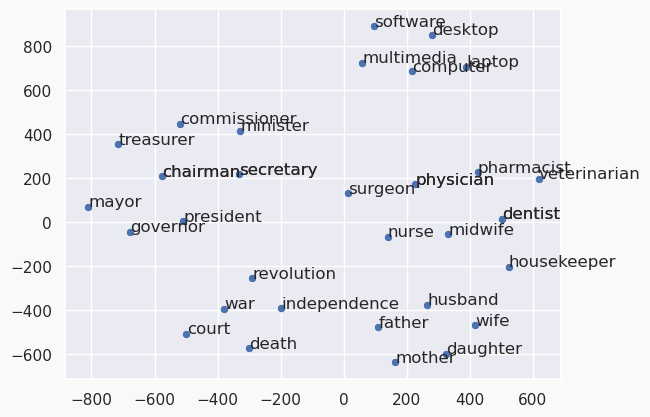

In [19]:
from sklearn.manifold import TSNE
# graphics
import matplotlib.pyplot as plt
# display matplotlib graphics in notebook
%matplotlib inline 
import seaborn as sns

# retrieve the word representation
# YOUR CODE HERE
words_vectors = np.zeros((0,50))
for i in range(len(list_of_ind)):
    current = list_of_ind[i]
    for ind in current:
        words_vectors = np.vstack((words_vectors,embedding_vectors[ind].reshape(1,-1)))

# create the tSNE transform
# YOUR CODE HERE
from sklearn.manifold import TSNE
tsne_instance = TSNE(random_state=0,n_iter=2000,perplexity=15.0)

# fit and transform the word vectors, store in T
# YOUR CODE HERE
T = tsne_instance.fit_transform(words_vectors)
# plot
fig = plt.figure()
fig.patch.set_facecolor('#f9f9f9')

sns.set(rc={'figure.figsize':(14, 8)})
sns.set(font_scale=1)

sns.scatterplot(x=T[:, 0], y=T[:, 1])

for label, x, y in zip(words_plus_neighbors, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')



In [20]:
words_vectors.shape

(35, 50)

### Semantic arithmetic with Word2Vec

One of the most original properties of Word2Vec embeddings is that the semantic relationships between vectors can be modelled by arithmetic operations. Given vectors representing the words `king`, `man` and `woman`, it is possible to compute the vector `v` as :  

`v = vector(king)-vector(man)+vector(woman)`

This operation corresponds to the following semantic relationship: *The king is to the man what the queen is to the woman*, which translates into the following arithmetic: *the concept of king, minus the concept of man plus the concept of woman gives the concept of queen*.

In fact, if we look in the embedding for the word whose closest vector is `v`, we find `reine`.


We will use a Word2Vec model pre-trained on the French Wac corpus.  This model has been trained on a corpus of 1 billion French words. 

This embedding is available in 2 formats:
- a text format for easy exploration of the model :
    - frWac_non_lem_no_postag_no_phrase_200_cbow_cut100.txt](https://storage.teklia.com/shared/deepnlp-labs/frWac_non_lem_no_postag_no_phrase_200_cbow_cut100.txt)
- a binary format that can be loaded using the Gensim library: 
    - [enWac_non_lem_no_postag_no_phrase_200_cbow_cut100.bin](https://storage.teklia.com/shared/deepnlp-labs/frWac_non_lem_no_postag_no_phrase_200_cbow_cut100.bin)

Download the text file onto your machine to analyse it.

#### Question: 
>* Add the file to your .gitignore
>* Give the size in Mb of the embedding files
>* By exploring the contents of the embedding file in text format, give the number of words for which this model provides embeddings and the size of the embedding for each word.



In [21]:
urlretrieve('https://storage.teklia.com/shared/deepnlp-labs/frWac_non_lem_no_postag_no_phrase_200_cbow_cut100.txt',
           'word2vec.txt')

('word2vec.txt', <http.client.HTTPMessage at 0x7f5584bfcf20>)

In [22]:
print(f'the size of the file is : {os.path.getsize('word2vec.txt')/1e6} Mb')

the size of the file is : 614.381407 Mb


In [23]:
w2v = open('word2vec.txt','r')

In [24]:
whole_embed = w2v.read().split()

In [25]:
words = 0
for i in whole_embed:
    try:
        float(i)
    except:
        words += 1

In [26]:
words

155808

In [27]:
(len(whole_embed) - words)/words

199.68424599507085

The given files has an embedding of 155 808 words. Even if there is probably an error in approximation at some point or an element of the list has been counted as a words where it shouldn't have, the embedding dimension is 200.

#### Word similarity

We are now going to use the [Gensim] library (https://radimrehurek.com/gensim/) to load the Word2Vec model and use it. 

#### Question: 
>* Modify the following code to load the Word2Vec template file in binary format using [load_word2vec](https://radimrehurek.com/gensim/models/keyedvectors.html#how-to-obtain-word-vectors)
>* Choose a couple of words and find the closest words according to the model using [most_similar](https://radimrehurek.com/gensim/models/keyedvectors.html#gensim.models.keyedvectors.KeyedVectors.most_similar)
>* To guess the meaning of the words ‘yokohama’, ‘kanto’ and ‘shamisen’, look for their nearest neighbours. Explain the results.


In [29]:
from gensim.models import KeyedVectors

## YOUR CODE HERE
urlretrieve('(https://storage.teklia.com/shared/deepnlp-labs/frWac_non_lem_no_postag_no_phrase_200_cbow_cut100.bin',
           "frWac_non_lem_no_postag_no_phrase_200_cbow_cut100.bin")
embedding_file ="frWac_non_lem_no_postag_no_phrase_200_cbow_cut100.bin"
model = KeyedVectors.load_word2vec_format(embedding_file, binary=True, unicode_errors="ignore")
## YOUR CODE HERE
model.most_similar("chevalier")

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

#### Semantic arithmetic

One of the most original properties of Word2Vec embeddings is that the semantic relationships between vectors can be modelled by arithmetic operations. Given vectors representing the words `king`, `man` and `woman`, it is possible to compute the vector `v` as :  

`v = vector(king)-vector(man)+vector(woman)`

This operation corresponds to the following semantic relationship: *The king is to the man what the queen is to the woman*, which translates into the following arithmetic: *the concept of king, minus the concept of man plus the concept of woman gives the concept of queen*.

In fact, if we look in the embedding for the word whose closest vector is `v`, we find `reine`.

#### Question: 
>* using the function [most_similar](https://radimrehurek.com/gensim/models/keyedvectors.html#gensim.models.keyedvectors.KeyedVectors.most_similar) specifying the arguments `positive` for the vectors to be added and `negative` for the vectors to be subtracted, check the relationship *the concept of king, minus the concept of man plus the concept of woman gives the concept of queen*.
>* Using the same method, find XXX in the following semantic relations
>   * Paris is to France what XXX is to Japan.
>   * Chevalier is to France what XXX is to Japan.

In [ ]:
## YOUR CODE HERE



## Contextual embeddings with BERT 

BERT was one of the first freely available Transformer language models, trained on large corpora. Many other models are available on HuggingFace.

As BERT is a contextual model, it is necessary to have it predict whole sentences in order to study the word embeddings it produces. In this section, we will compare the embeddings obtained for polysemous words according to the sentence in which they are used.

In English, *plant* has two meanings: plant and vegetable. With a non-contextual embedding, such as Glove or Colobert, these two meanings of the word plus are associated with an identical embedding. With BERT, we'll see that the same word can have several embeddings depending on the context.

First, load the BERT model and tokenizer from HuggingFace : 

In [32]:
import torch
from transformers import BertTokenizer, BertModel
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
# Load pre-trained model 
model = BertModel.from_pretrained('bert-base-uncased',
                                  output_hidden_states = True, # to access the hidden states
                                  )
# set the model to "evaluation" mode
model.eval()

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

### Tokenizer

Language models are trained with a specific breakdown of sentences into tokens. These tokens can be words or parts of words. It is necessary to use the tokenizer corresponding to each model.

tokenizer.vocab.keys() gives the list of all the tokens known for the language model. 

#### Question
>* How many different tokens are known to the BERT tokenizer?
>* Display a hundred tokens at random. What do you find?

In [41]:
import random
# number of token in tokenizer
# YOU CODE HERE
print(f'The BERT tokenizer knows {len(tokenizer.vocab.keys())} different tokens')
# sample of 100 tokens
# YOU CODE HERE
whole_thing = list(tokenizer.vocab.keys())
for i in range(100):
    print(whole_thing[random.randint(0,30522)])


The BERT tokenizer knows 30522 different tokens
courtyard
susanna
##36
clipped
##lands
##mans
westward
introduced
cm
##ð
##zed
possibility
depending
introduce
este
forewings
backstage
theme
argyll
##itte
appearance
##ds
crying
beethoven
rus
separates
climax
vectors
renal
clause
rosenberg
cameo
ein
sarcasm
yarmouth
##mism
espionage
##⁺
##星
tire
member
justin
intervene
backbone
[unused579]
##gu
denton
bark
preaching
correction
critical
##ɬ
prisoners
automatically
bitter
##jana
depressed
personal
dismay
[unused275]
renegade
healed
##軍
bon
stacks
fully
franks
clues
57
patiently
49th
tonga
##ם
reassured
baltic
1764
##reen
##abe
null
##dates
laboratories
refining
supporting
vegetarian
northwards
##oi
##ろ
##gb
sporadic
##uation
helicopters
hastily
chromosome
##pit
bronze
ip
nurse
downstream
伊
saint


The tokenizer splits sentences and transforms the elements (words or sub-words) into clues. 

BERT can process several sentences, but you need to tell it how the sentences (segments) have been split, with an index: 0 for the first sentence, 1 for the second. 

Two specific tokens must also be added: 
* CLS], a specific token used for sentence classification
* SEP], the end of sentence token.

#### Question
>* Apply the bert_tokenize function to the 3 phases and keep the 3 vectors (index, token, segment).
>* Display this information for each of the sentences and check that the word *plant* has the same token index in the two sentences in which it appears.

In [44]:
snt1 = "The plant has reached its maximal level of production."
snt2 = "The cars are assembled inside the factory."
snt3 = "A plant needs sunlight and water to grow well."


def bert_tokenize(snt):
    """ Apply the BERT tokenizer to a list of words representing a sentence
        and return 3 lists: 
        - list of token indx
        - list of token for debugging, not used by the BERT model
        - list of sentence index
        """
    # Add the special tokens.
    tagged_snt = "[CLS] " + snt + " [SEP]" 
    # Tokenize
    tokenized_snt = tokenizer.tokenize(tagged_snt)
    # convert tokens to indices
    indexed_snt = tokenizer.convert_tokens_to_ids(tokenized_snt)
    # mark the words in sentence.
    segments_ids = [1] * len(tokenized_snt)

    return (indexed_snt, tokenized_snt, segments_ids)

# YOUR CODE HERE

vect_1 = bert_tokenize(snt1)
vect_2 = bert_tokenize(snt2)
vect_3 = bert_tokenize(snt3)

In [63]:
count_1 = 0
idx_1 = 0
for i in vect_1[1]:
    if i == 'plant':
        idx_1 = vect_1[0][count_1]
    count_1 += 1

count_3 = 0
idx_3 = 0
for i in vect_3[1]:
    if i == 'plant':
        idx_3 = vect_3[0][count_3]
    count_3 += 1

In [56]:
print(idx_1,idx_3)

3269 3269


## Inference

To calculate embeddings, we need to make a prediction using the BERT model on a complete sentence. The *predict_hidden* function converts the token and segment index lists into a pytorch tensor and applies the model. 

The model used is a 12-layer model. We will use the last hidden layer of the model as an embedding to represent the words. Other solutions are possible, such as concatenation or averaging of several layers.


#### Question
>* Apply the model to each of the 3 sentences and store the resulting embeddings (tensors).
>* Display the dimension of the resulting tensors. What is the dimension of the embedding vector for each word?

In [57]:

def predict_hidden(indexed_snt, segments_ids):
    """Apply the BERT model to the input token indices and segment indices
        and return the last hidden layer
    """
    with torch.no_grad():
        # Convert inputs to PyTorch tensors
        tokens_tensor = torch.tensor([indexed_snt])
        segments_tensors = torch.tensor([segments_ids])
        outputs = model(tokens_tensor, segments_tensors)
        hidden_states = outputs[2]
        one_hidden_layer = hidden_states[12][0]
        
    return one_hidden_layer

# YOUR CODE HERE



In [59]:
hidden_1 = predict_hidden(vect_1[0],vect_1[2])
hidden_2 = predict_hidden(vect_2[0],vect_2[2])
hidden_3 = predict_hidden(vect_3[0],vect_3[2])

In [62]:
hidden_3.shape

torch.Size([12, 768])

The embedding size of each word is 768.

The hidden layer returned by the *predict_hidden* function is a tensor containing a context vector representing each token in the input sentence. We can use this vector to represent the meaning of this word as a function of its context. We're going to compare the representation of the polysemous word *plant* as a function of its context.

#### Question
>* Using the [cosine distance](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cosine.html), calculate the following distances:
> * distance between *plant* in sentence 1 (plant-factory) and *plant* in sentence 3 (plant-vegetal)
> * distance between *plant* in sentence 1 (plant-factory) and *factory* in sentence 2 (plant-vegetal) 
> * distance between *plant* in sentence 1 (plant-factory) and *production* in sentence 2 
> distance between *plant* in sentence 3 (plant-vegetal) and *production* in sentence 2 
> How can we interpret these distances?

In [71]:
from scipy.spatial.distance import cosine

# YOUR CODE HERE
#distance between plant sentence 1 and plant sentence 3:
d13 = cosine(hidden_1[2],hidden_3[2])

#distance between plant sentence 1 and factory snt2:
d12 = cosine(hidden_1[2],hidden_2[7])

#distance between plant snt1 and production snt1 (production doesnt appear in snt2):
d11 = cosine(hidden_1[2],hidden_1[9])

#distance between production and plant (vegetal)
d13bis = cosine(hidden_1[9],hidden_3[2])

In [72]:
print('d13 : ', d13, '\n',
     'd12 : ', d12, '\n',
     'd11 : ', d11, '\n',
     'd13bis : ', d13bis)

d13 :  0.49866265 
 d12 :  0.31225687 
 d11 :  0.2401734 
 d13bis :  0.6200191


The results are, here, not easy to interpret as we would have expected that the words linked to the idea of production/plant would have been more similar than 'plant' in a vegetal sense...

In [78]:
print('for snt1 : ',vect_1[1][2],vect_1[1][9], '\n',
     'for snt2 : ', vect_2[1][7], '\n',
     'for snt3 : ', vect_3[1][2])

for snt1 :  plant production 
 for snt2 :  factory 
 for snt3 :  plant
